In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
LEGO       = pd.read_csv("LEGO.csv")
LEGO = LEGO[LEGO["date"] == LEGO["date"].max()]

TH         = pd.read_csv("TH-Aschaffenburg.csv")
TH_Faecher = pd.read_csv("TH-Aschaffenburg_Faecher.csv")

tips       = pd.read_csv("tips.csv")

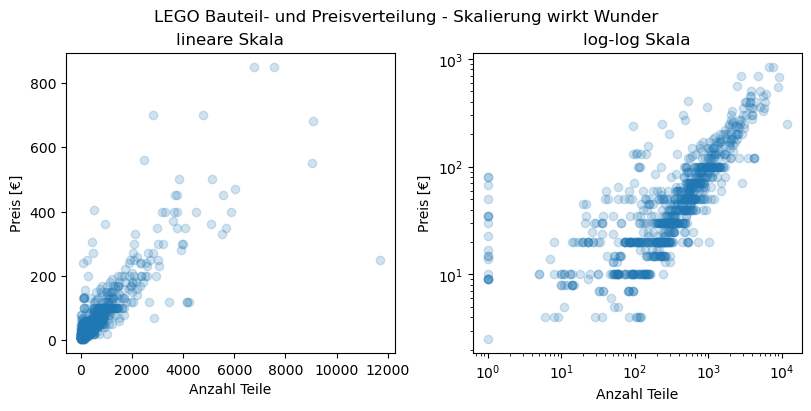

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), layout="constrained")

axs[0].scatter(x= LEGO["piece_count"], y= LEGO["price"], alpha = 0.2)
axs[1].scatter(x= LEGO["piece_count"], y= LEGO["price"], alpha = 0.2)

axs[1].set_xscale("log")
axs[1].set_yscale("log")

axs[0].set_xlabel("Anzahl Teile")
axs[0].set_ylabel("Preis [€]")
axs[0].set_title("lineare Skala")

axs[1].set_xlabel("Anzahl Teile")
axs[1].set_ylabel("Preis [€]")
axs[1].set_title("log-log Skala")

fig.suptitle("LEGO Bauteil- und Preisverteilung - Skalierung wirkt Wunder")
fig.savefig("vis_ex_1.png")
plt.show()

In [4]:
TH["year"] = TH.Jahr.str.slice(start=2, stop=5).astype(int) + 2000
TH_IW = (TH.merge(TH_Faecher, how="left", left_on="Fach", right_on="Abkürzung")
    .query("Fakultät == 'IW'")
    .sort_values(["Jahr", "Studierende"], ascending = [False, False]))
TH_IW.head()

,Jahr,Fach,Anfänger,Studierende,year,Abkürzung,Langname,Fakultät
211,WS 20/21,WI,61.0,242,2020,WI,Wirtschaftsingenieurwesen,IW
203,WS 20/21,M,43.0,233,2020,M,Mechatronik,IW
202,WS 20/21,MKD,62.0,225,2020,MKD,Multimediale Kommunikation und Dokumentation,IW
201,WS 20/21,ITV,20.0,179,2020,ITV,Internationales Technisches Vertriebsmanagement,IW
198,WS 20/21,EIT,29.0,140,2020,EIT,Elektro- und Informationstechnik,IW


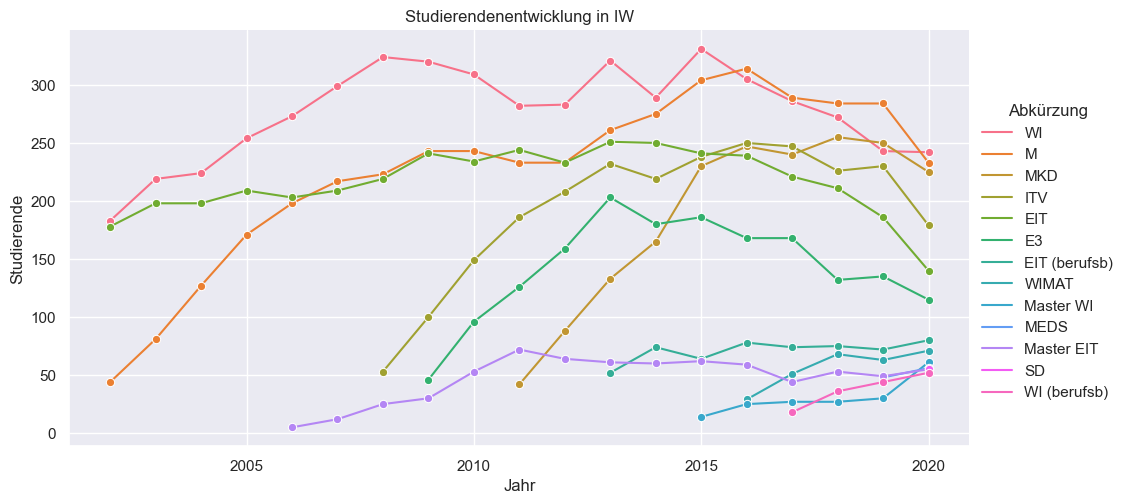

In [5]:
sns.set_theme()
g = sns.relplot(data = TH_IW, x = "year", y = "Studierende", hue="Abkürzung",marker="o", kind = "line", height=5 , aspect=2)
g.set(title="Studierendenentwicklung in IW", xlabel="Jahr", xticks=[2005, 2010, 2015, 2020])
g.fig.savefig("vis_ex_2.png")
plt.show()

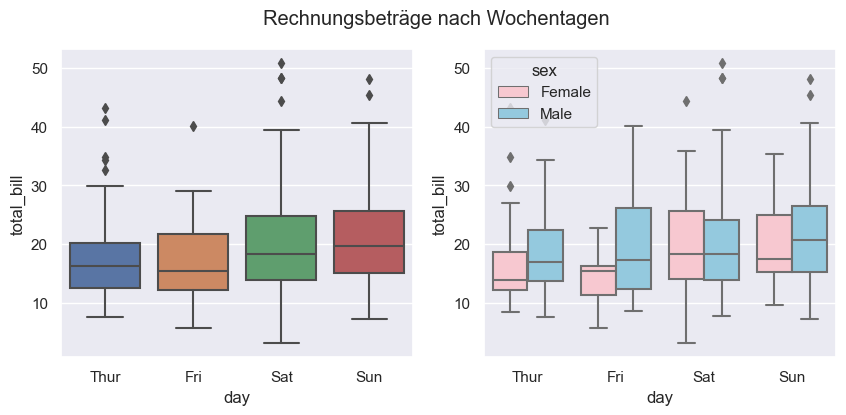

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(data=tips, x="day", y = "total_bill", order=["Thur", "Fri", "Sat", "Sun"], ax=axs[0])
sns.boxplot(data=tips, x="day", y = "total_bill", order=["Thur", "Fri", "Sat", "Sun"], hue="sex", palette=dict(Female="pink",Male="skyblue"), ax=axs[1])
fig.suptitle("Rechnungsbeträge nach Wochentagen")
fig.savefig("vis_ex_3.png")
plt.show()